## Saloni Agrawal
## 18BTRCR003
## Advanced Machine Learning Lab 
## Experiment 2

<h1> <center> Handwritten Digits Recognition using Deep Neural Networks </center> </h1>

<img src="https://thumbs.gfycat.com/IgnorantTediousAnaconda-size_restricted.gif" >

__Importing the modules__

In [1]:
import numpy as np                   
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
%matplotlib inline

from keras.datasets import mnist     # MNIST dataset 
from keras.models import Sequential  # Model type 

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used 
from keras.utils import np_utils                         # NumPy related tools

Using TensorFlow backend.


__Training Data__

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of y_test (10000,)


_Importing some sample images from the dataset_

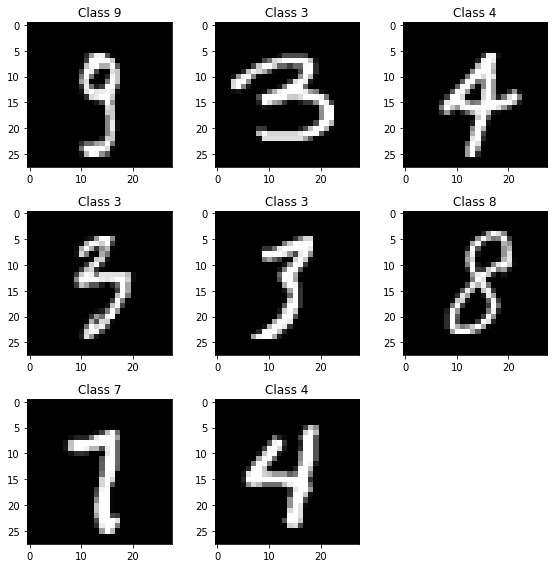

In [4]:
plt.rcParams['figure.figsize'] = (8,8) # Make the figures a bit bigger

for i in range(8):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

In [5]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

__Building a 3-layer fully connected FCN__

In [7]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

_First Hidden layer_

In [8]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [9]:
# An "activation" is a non-linear function applied to the output of the layer above.
model.add(Activation('relu'))

In [10]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
model.add(Dropout(0.2))

_Second Hidden Layer_

In [11]:
# The second hidden layer appears identical to our first layer.
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

_Final Layer_

In [12]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
model.add(Dense(10))

In [13]:
model.add(Activation('softmax'))

In [14]:
# Summarize the built model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

__Train the Model__

In [16]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.2451 - accuracy: 0.9266
Epoch 2/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.1025 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.0716 - accuracy: 0.9779
Epoch 4/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.0551 - accuracy: 0.9823
Epoch 5/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.0449 - accuracy: 0.9857


__Evaluating model accuracy on test data__

In [17]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 128us/step
Test score: 0.06750587331078131
Test accuracy: 0.9799000024795532


In [18]:
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

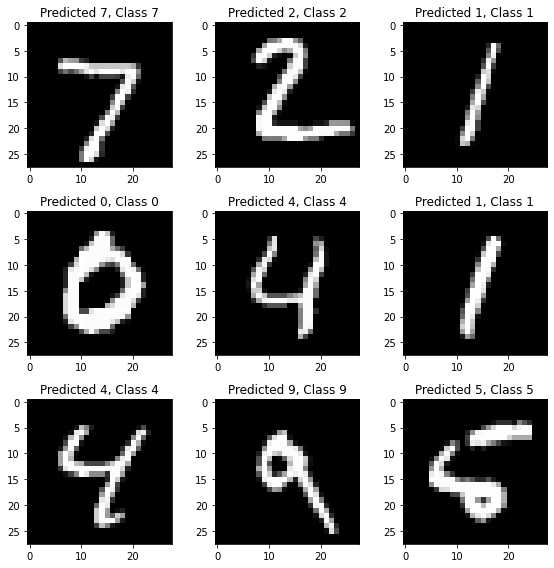

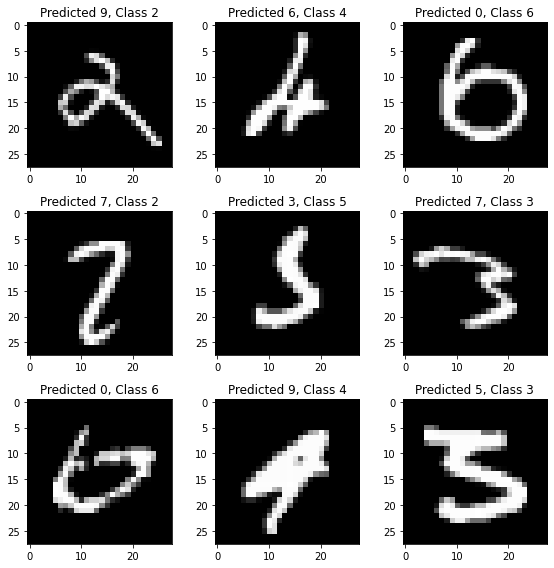

In [19]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()